# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

##### 1.1) Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

##### 1.2) Carregando o DataFrame

In [2]:
# Carregando base de dados 'demo01.csv'
df = pd.read_csv('demo01_dummy.csv')
df_linhas, df_col = df.shape   # Consultando o número de linhas e colunas
print('A base de dados tem', df_linhas,'linhas e', df_col,'colunas')
df.head()

A base de dados tem 16650 linhas e 34 colunas


,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,0,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,0,1,0,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,0,1,0,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,1,0,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,1,0,0,0,0,1,0,0,0,0


#### 1.3) Visualizando estrutura da base de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   16650 non-null  float64
 9   mau                                     16650 non-null  bool   
 10  sexo_M                                  16650 non-null  in

#### 1.4) Preparando a base de dados

In [4]:
# Excluíndo coluna "Unnamed: 0"
df.drop("Unnamed: 0",axis = 1, inplace = True)
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0


In [5]:
# Ajustando a coluna 'mau' para do tipo 'inteiro'
df.mau = df.mau.astype(int)
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,1,0,0,0,0,1,0,0,0,0


###### 1.5)  Visualizando dados do tipo 'Missing'

In [6]:
# Confirmando a ausência de Dados Missing
pd.DataFrame(df.isna().sum(), columns= ['Total de valores missing']).transpose()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
Total de valores missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 1.6) Dividindo a base em treino e teste

In [7]:
# Separando as variáveis
y = df.mau
X = df.drop('mau',axis=1)

In [8]:
# Separando 70% da base para treinamento e 30% para validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

#### 2.1) Definindo um objeto com a função da árvore de decisão 

In [9]:
clf = DecisionTreeClassifier(random_state=100)

#### 2.2) Treinando o modelo com os dados separados para treinamento 

In [10]:
clf = clf.fit(X_train,y_train)

#### 2.3) Visualizando a árvore 

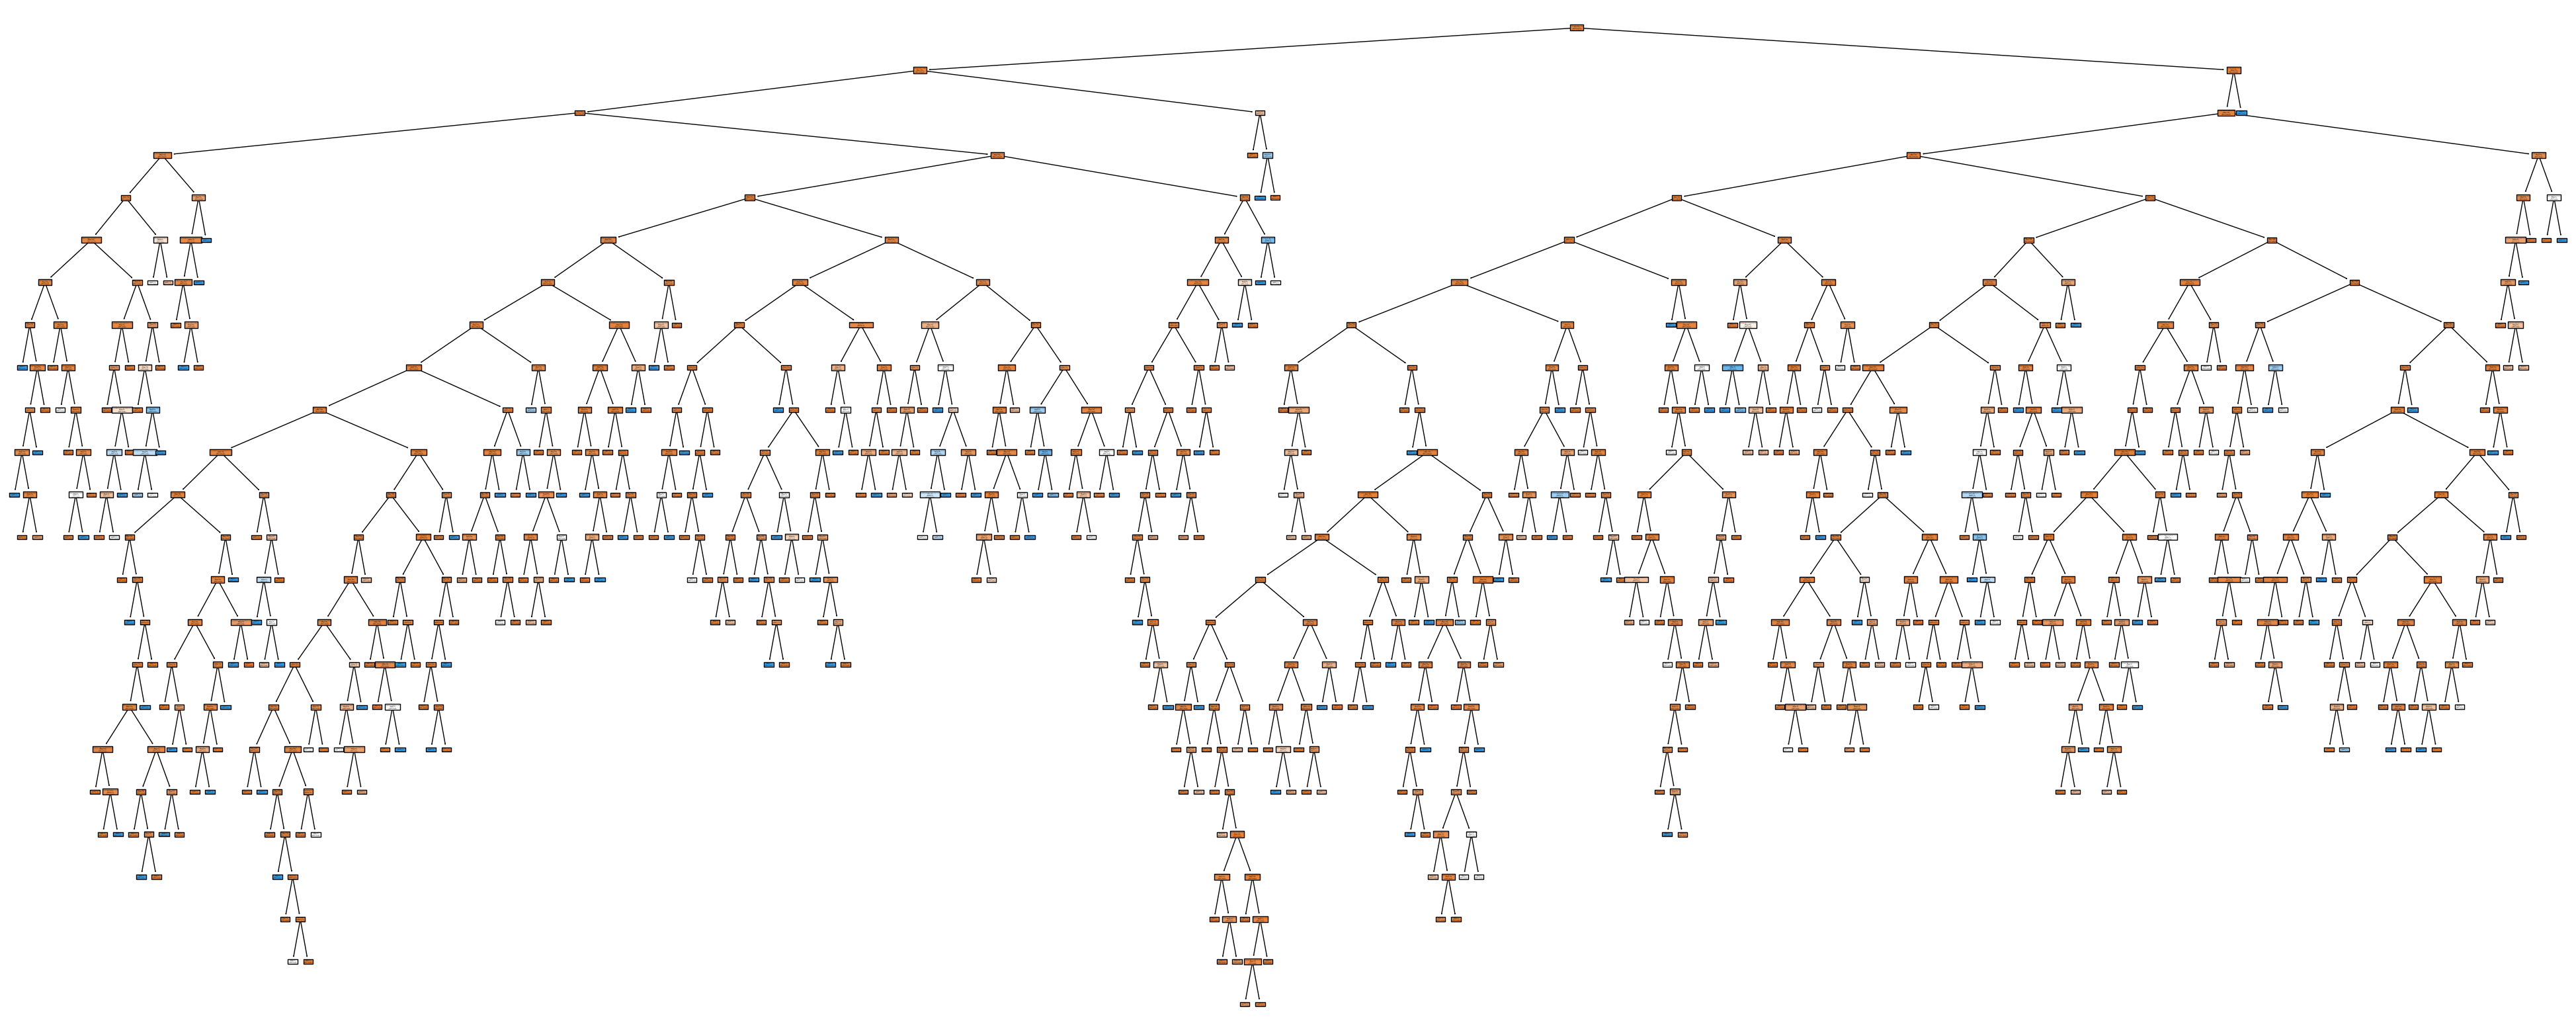

In [11]:
plt.figure(figsize=(50, 20))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns);

#### 2.4) visualizando a matriz de classificação (ou matriz de confusão)

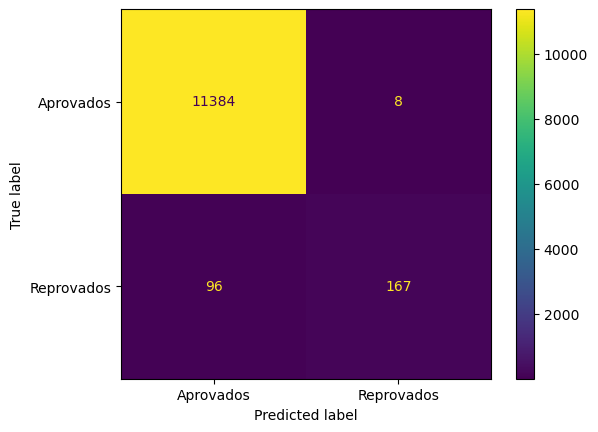

In [12]:
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

#### 2.5) Calculando a acurácia na base de treinamento

In [13]:
accuracy_score(y_train, predictions)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

#### 3.1) Classifiando a base de teste de acordo com a árvore treinada no item 2

In [14]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

#### 3.2) visualizando a matriz de classificação (ou matriz de confusão)

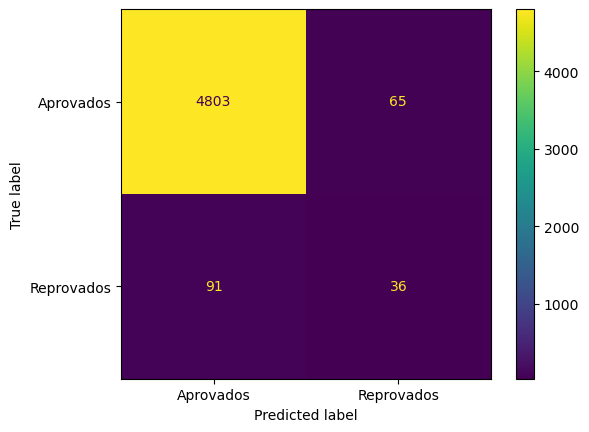

In [15]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

#### 3.3) Calculando a acurácia na base de teste

In [16]:
accuracy_score(y_test, predictions)

0.9687687687687687

#### 3.4) Treinando uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10

In [17]:
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10 ,random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9727727727727727

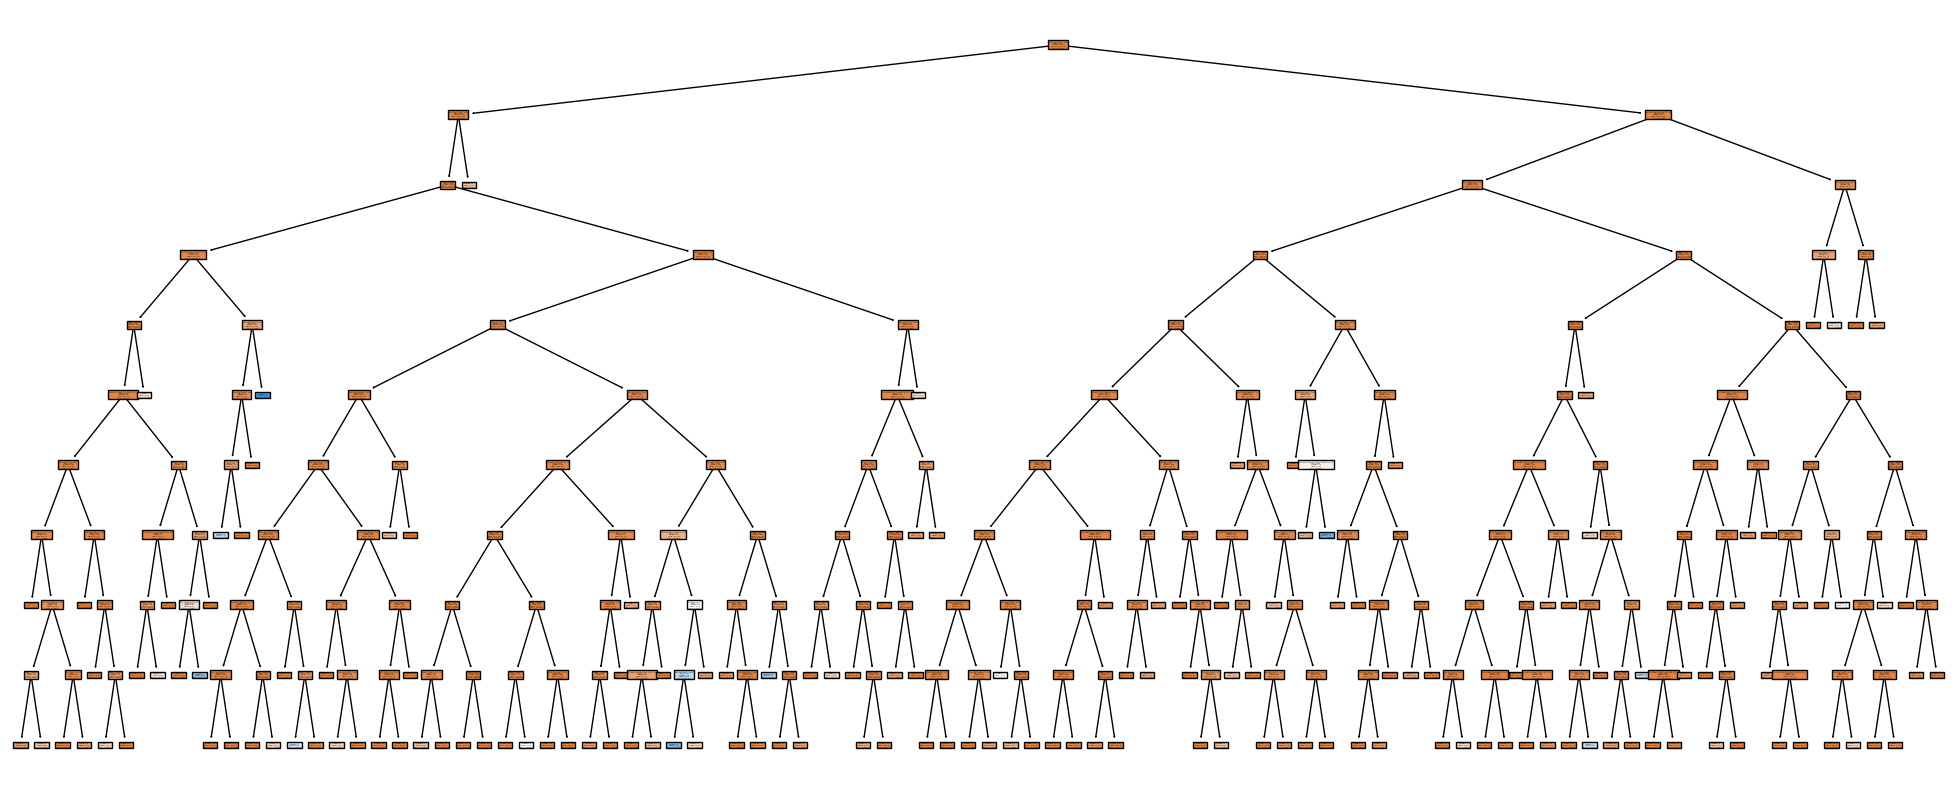

In [18]:
# Visualizando árvore de teste
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_test.columns);

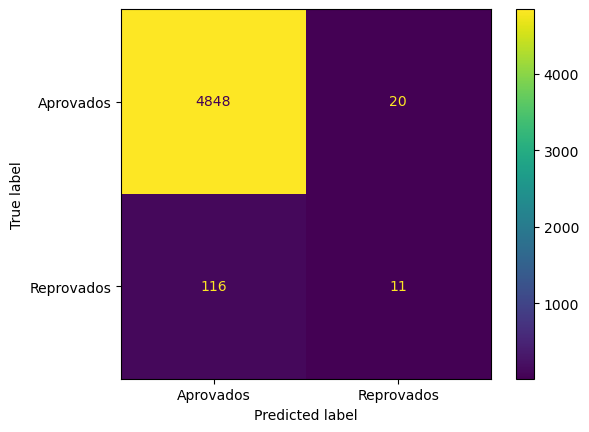

In [19]:
# Visualizando a matriz de classificação
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

**Avaliação da Matriz:** após a nova configuração, houve uma melhora na acurácia; saíndo de aproximadamente 0,9688 para 0,9728. 

In [20]:
# Proporção de proponentes que foram classificados como 'maus'
tab = pd.crosstab(index = predictions, columns = y_test)
linhas,_ = X_test.shape
print(tab[1][1] / linhas)

0.0022022022022022024


#### 3.5) Verificando a acurácia com todos os contratos classificados como 'bons'

In [21]:
# Considerando todos como 'bons'
y_test.loc[y_test == 1] = 0

In [22]:
# Visualizando todos como 'bons'
y_test.value_counts()

0    4995
Name: mau, dtype: int64

In [23]:
# Calculando a nova acurácia
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10 ,random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9937937937937938

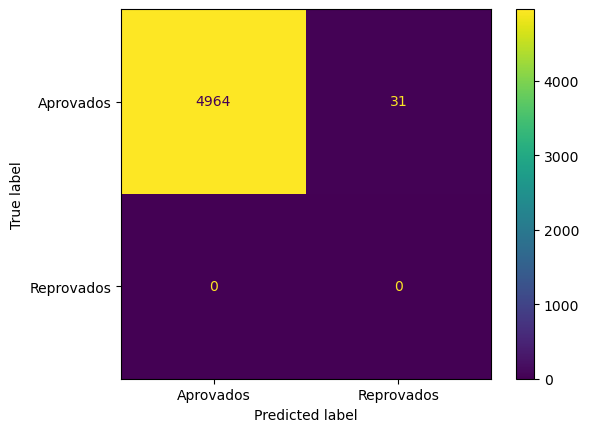

In [24]:
# Visualizando a matriz de classificação
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

**Resultado:** se todos os contratos fossem classificados como 'bons', os 116 'Reprovados' na base seriam somados aos 'Aprovados' na realização do teste, e os 11 'Aprovados' na base seriam somados aos 'Reprovados' na realização do teste. Passando a acurácia de 0,9728 para 0,9938.